In [6]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import trompy as tp

from scipy import stats

import dill

rcParams['font.family'] = 'Arial'
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]

savefigs = True

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")
FIGSFOLDER = Path("C:/Users/jmc010/Dropbox/Publications in Progress/Bazzino Roitman_sodium/figs")

In [15]:
with open(DATAFOLDER / "snips_angvel.pickle", "rb") as f:
    snips_vel = dill.load(f)

snips_vel.shape


(1519, 200)

In [16]:
with open(DATAFOLDER / "x_angvel.pickle", "rb") as f:
    x_vel = dill.load(f)

x_vel.shape

(1519, 5)

In [17]:
x_vel.id.unique()

array(['PB23', 'PB24', 'PB33', 'PB39', 'PB391', 'PB44', 'PB61', 'PB62',
       'PB64', 'PB70', 'PB26', 'PB27', 'PB30', 'PB31', 'PB46', 'PB48'],
      dtype=object)

     trial    id condition infusiontype sex
931      0  PB26   deplete       45NaCl   M
932      1  PB26   deplete       45NaCl   M
933      2  PB26   deplete       45NaCl   M
934      3  PB26   deplete       45NaCl   M
935      4  PB26   deplete       45NaCl   M


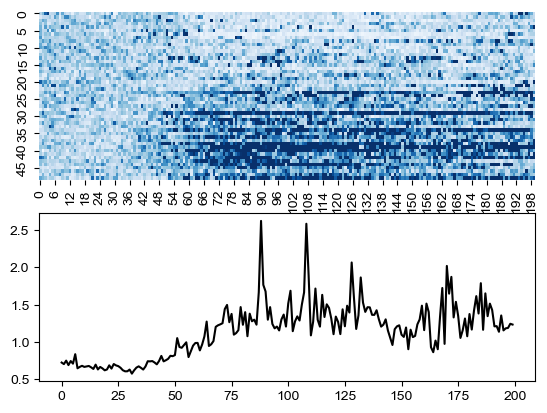

In [18]:

def get_heatmap_data(snips, x_array, condition, infusiontype):
    query_string = "condition == @condition & infusiontype == @infusiontype"

    heatmap_data = []
    df = x_array.query(query_string)
    print(df.head())
    for trial in df.trial.unique():
        tmp_snips = snips[x_array.query(query_string + " & trial == @trial").index]
        mean_snip = np.nanmean(tmp_snips, axis=0)
        heatmap_data.append(mean_snip)
        
    return np.array(heatmap_data)

d = get_heatmap_data(snips_vel, x_vel, "deplete", "45NaCl")

f, ax = plt.subplots(nrows=2)
sns.heatmap(d, vmin=0, vmax=2, cmap="Blues", cbar=False, ax=ax[0])
ax[1].plot(np.mean(d, axis=0), color="black")

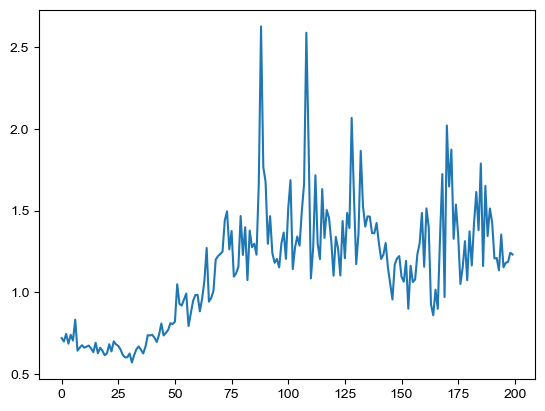

In [14]:
plt.plot(np.mean(d, axis=0))